In [1]:
from myRegressionModule import myLinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Lets create some Artificial Data for Regression

In [2]:
myScaler=StandardScaler()
raw_data=pd.read_csv('Ice_cream selling data.csv')
df=raw_data.copy()
x=df['Temperature (°C)'].values
# Lets scale the values
myScaler.fit(x.reshape(-1,1))
x=myScaler.transform(x.reshape(-1,1))
y=df['Ice Cream Sales (units)'].values

# Lets split up the values 
x_train_and_validation,x_test,y_train_and_validation,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_and_validation,y_train_and_validation,test_size=0.2,random_state=42)

In [3]:
print(x_train.shape,x_val.shape)

(35, 1) (9, 1)


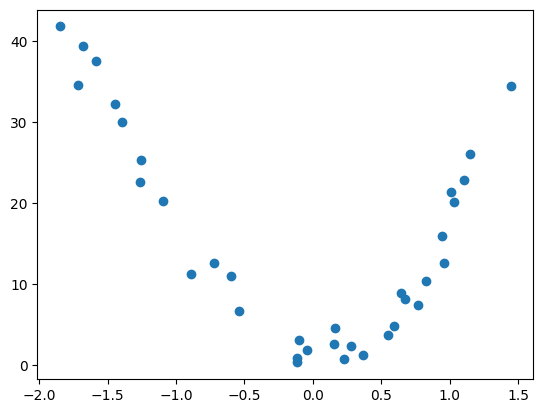

In [4]:
plt.scatter(x_train,y_train)

In [5]:
df.describe(include='all')

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [6]:
print(x_train.shape,y_train.shape)

(35, 1) (35,)


In [7]:
linear_model=myLinearRegression()
linear_model.fit(x_train.reshape(-1,1),y_train)

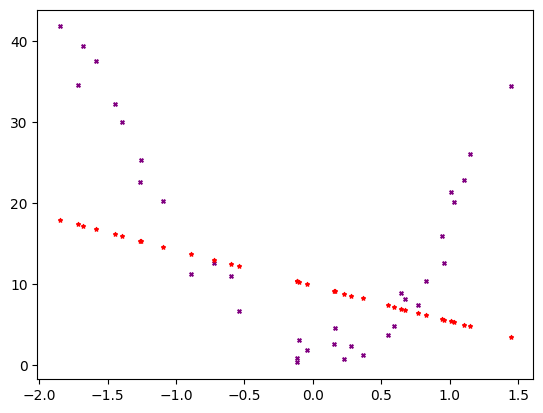

In [8]:
predictions=linear_model.predict()
linear_model.plot_visualize(predictions)

In [9]:
max_order=8
arr=[]
arr_val=[]
arr_test=[]
m=x_train.shape[0]
m_val=x_val.shape[0]
m_test=x_test.shape[0]
# m is the no. of observations
# n is the number of features for training
for i in range(max_order):
    x=np.zeros((m,i+1))
    X_val=np.zeros((m_val,i+1))
    X_test=np.zeros((m_test,i+1))
    for j in range(x.shape[1]):
        x[:,j]=np.power(x_train.reshape(m,),j+1)
        X_val[:,j]=np.power(x_val.reshape(m_val,),j+1)
        X_test[:,j]=np.power(x_test.reshape(m_test,),j+1)
    arr.append(x)
    arr_val.append(X_val)
    arr_test.append(X_test)

## The `arr` array contains the 10 different training inputs for the same output y  

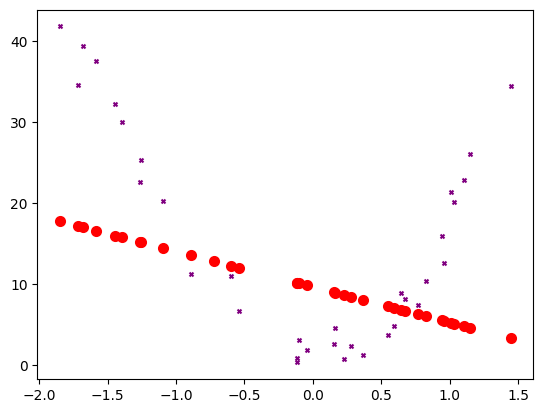

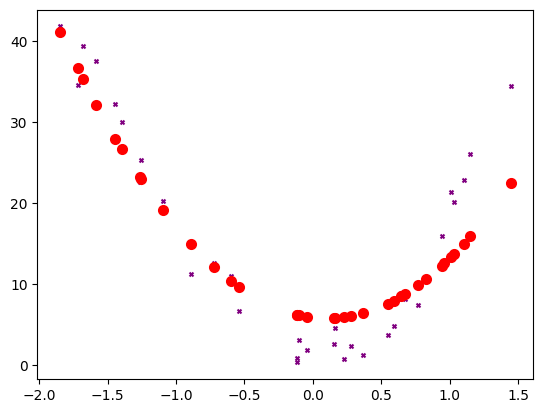

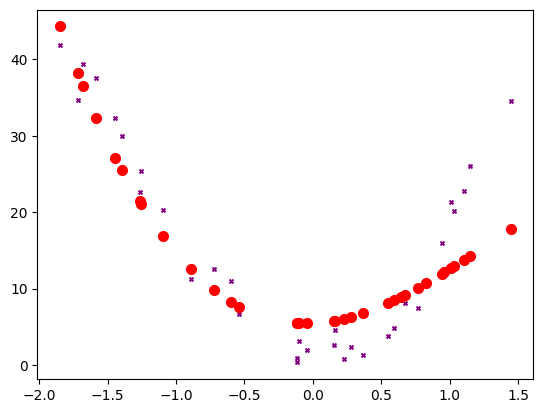

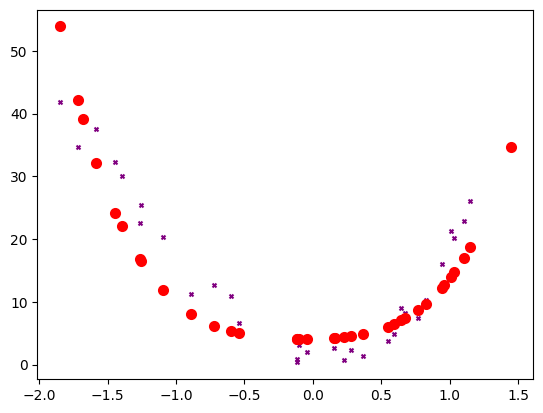

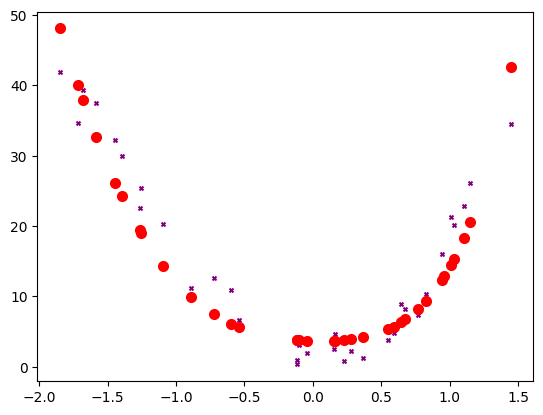

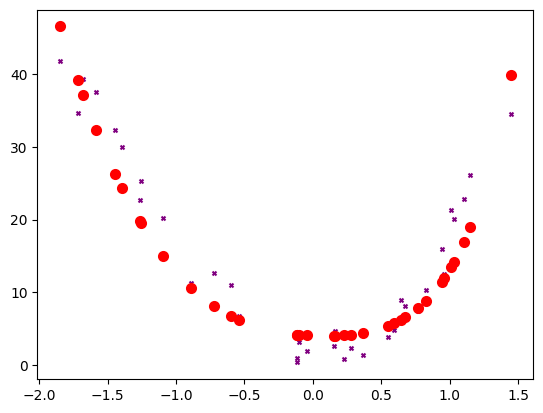

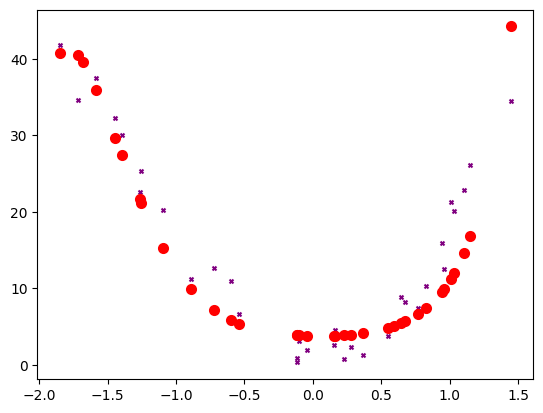

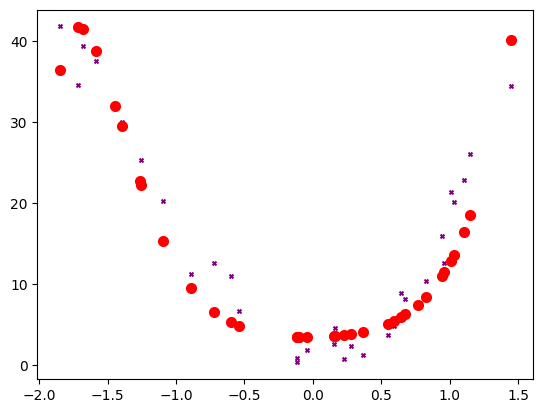

In [10]:
models=[]
for i in range(len(arr)):
    model=myLinearRegression()
    model.fit(arr[i],y_train)
    predictions=model.predict()
    plt.scatter(x_train,y_train,marker='x',c='purple',s=8)
    plt.scatter(x_train,predictions,color='red',lw=2)
    plt.show()
    models.append(model)

In [11]:
val_costs=[]
for i in range(len(arr_val)):
    val_cost=(1/(2*m_val))*np.sum((models[i].predict(arr_val[i])-y_val)**2)
    val_costs.append(val_cost)

In [12]:
np.argmin(val_costs)+1

2

In [13]:
val_costs

[126.9783600373564,
 16.207149734984206,
 34.32995222903973,
 30.941907915215456,
 94.14368281508811,
 81.92995587212613,
 322.20108506610967,
 78.62840959541155]

In [14]:
train_costs=[]
for model in models:
    train_costs.append(model.J_hist[-1])

In [15]:
np.argmin(train_costs)+1

8

In [16]:
train_costs

[77.99094114729769,
 10.494352826556662,
 14.090774390865688,
 12.706307057227548,
 8.002322764229511,
 7.993528892898326,
 9.93011982413534,
 7.484007929353556]

## We choose model 3 as it gives the least validation cost 

### Lets test the model 3 on the test data and find the test_cost

In [17]:
model_2=models[1]

In [18]:
test_cost=(1/(2*m_test))*np.sum((model_2.predict(arr_test[1])-y_test)**2)

In [19]:
test_cost

15.782393008859273

so the validation cost is equal to the test cost so this model is a good choice